<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/CNN_Cats_vs_Dogs_Classification/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import cv2
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

In [22]:
!curl -L https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -o cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0  91.4M      0 --:--:-- --:--:-- --:--:-- 91.3M
Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [41]:
datagen = ImageDataGenerator(
      rotation_range = 50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      brightness_range=None,
      shear_range=0.2,
      zoom_range=0.2,
      channel_shift_range=0.2,
      fill_mode='nearest',
      horizontal_flip=True,
      vertical_flip=True,
  )

In [23]:
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [24]:
classes = ['Cat', 'Dog']

In [25]:
le = LabelEncoder()

In [26]:
def process_data(img_size=(32,32)):

  local_x = []
  local_y = []

  for i in range(len(os.listdir(train_dir))):
    dir = os.path.join(train_dir, os.listdir(train_dir)[i])
    for j in range(len(os.listdir(dir))):
      img = cv2.imread(os.path.join(dir, os.listdir(dir)[j]))
      img_resized = cv2.resize(img, img_size)
      local_x.append(img_resized)
      local_y.append(os.listdir(train_dir)[i])

  local_x = np.array(local_x)
  local_x = local_x / 255.0
  local_y = np.array(local_y)
  encoded_y = le.fit_transform(local_y)

  x_train,x_test, y_train, y_test =train_test_split(local_x, encoded_y, test_size=0.2)
  return x_train, x_test, y_train, y_test

In [27]:
def show_images(x, y, y_pred, n=100):
  plt.figure(figsize=(20,16))
  for i in range(n):
    plt.subplot(10, 20, i+1)
    plt.imshow(x[i])
    if len(y_pred) > 0:
      plt.title(f' {classes[y_pred[i]]} ({classes[y[i]]})')
    else:
      plt.title(f'{classes[y[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [61]:
x_train, x_test, y_train, y_test = process_data((224,224))

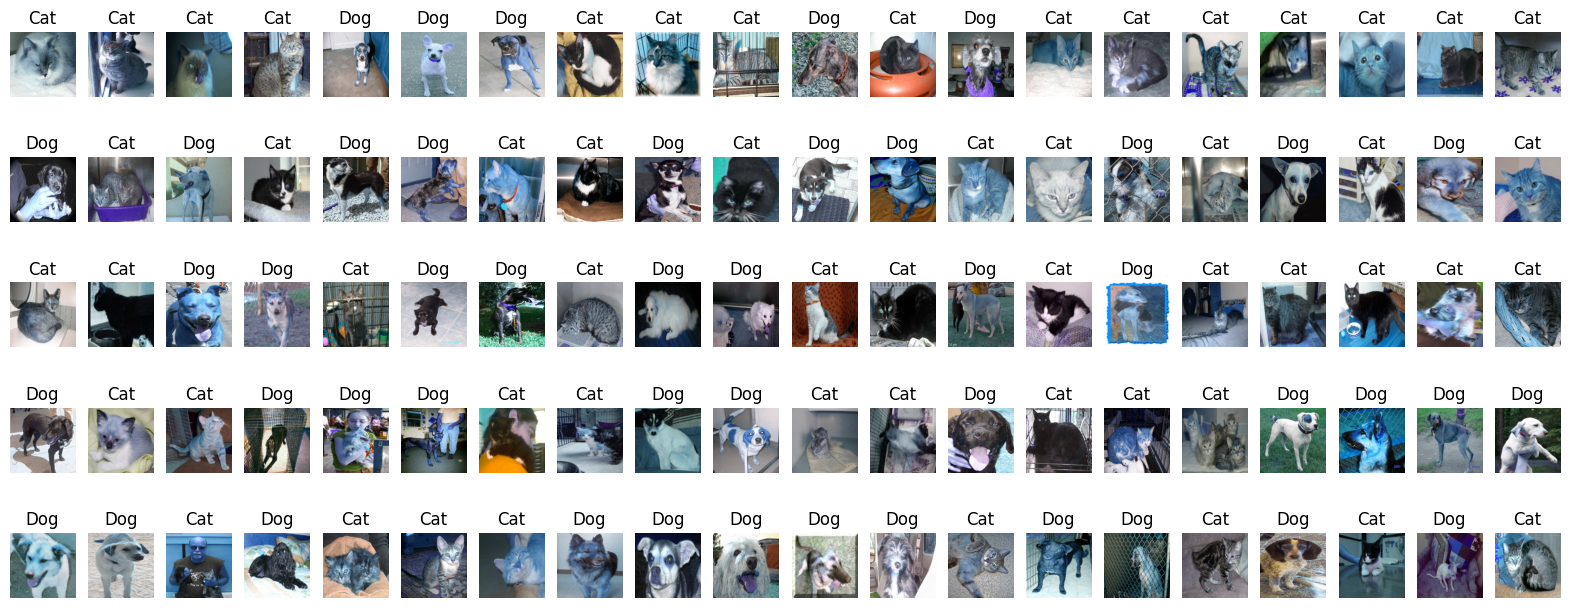

In [62]:
show_images(x_train,y_train, [] )

In [64]:
def evalute_model(y, y_pred):
  result = np.argmax(y_pred, axis=1)
  print(accuracy_score(y, result))

In [65]:
cf100_model = tf.keras.models.load_model('/content/cf100.h5')
# cf100_model.trainable = False
cf100_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,243,628 (8.56 MB)

 Trainable params: 2,242,730 (8.56 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 2 (12.00 B)

In [66]:
mobile_net_model = MobileNetV2(weights='imagenet', input_shape=(224,224,3), include_top=False)
mobile_net_model.summary()
mobile_net_model.trainable = False

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_14[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [67]:
def train_model(x_train, y_train, x_test, y_test, epochs=20):
  model = tf.keras.Sequential([
    mobile_net_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])
  model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
  model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=epochs, validation_data = (x_test, y_test))

In [68]:
train_model(x_train, y_train, x_test, y_test, epochs=20)
# evalute_model(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 54s 734ms/step - accuracy: 0.6046 - loss: 10.4239 - val_accuracy: 0.9350 - val_loss: 0.2786
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 391ms/step - accuracy: 0.7657 - loss: 1.9128 - val_accuracy: 0.9550 - val_loss: 0.1661
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 384ms/step - accuracy: 0.8386 - loss: 0.6999 - val_accuracy: 0.9400 - val_loss: 0.1471
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 386ms/step - accuracy: 0.8356 - loss: 0.5413 - val_accuracy: 0.9725 - val_loss: 0.0905
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 383ms/step - accuracy: 0.8584 - loss: 0.3646 - val_accuracy: 0.9700 - val_loss: 0.0962
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 372ms/step - accuracy: 0.8771 - loss: 0.3611 - val_accuracy: 0.9625 - val_loss: 0.0960
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 391ms/step - accuracy: 0.8678 - loss: 0.3536 - val_accuracy: 0.9650 - val_loss: 0.0953
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 366ms/step - accuracy: 0.8995 - loss: 0.2740 - val_acc